## jfkldajklfd

In [149]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [150]:
df1= pd.read_csv('drug200.csv')
df1.head(n=10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [151]:
df=df1.copy()


In [152]:
le = LabelEncoder() 
df['Sex']= le.fit_transform(df['Sex'])
df['Cholesterol']= le.fit_transform(df['Cholesterol'])
df['BP']= le.fit_transform(df['BP'])


C:\Users\cdb3755\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cdb3755\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cdb3755\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cdb3755\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


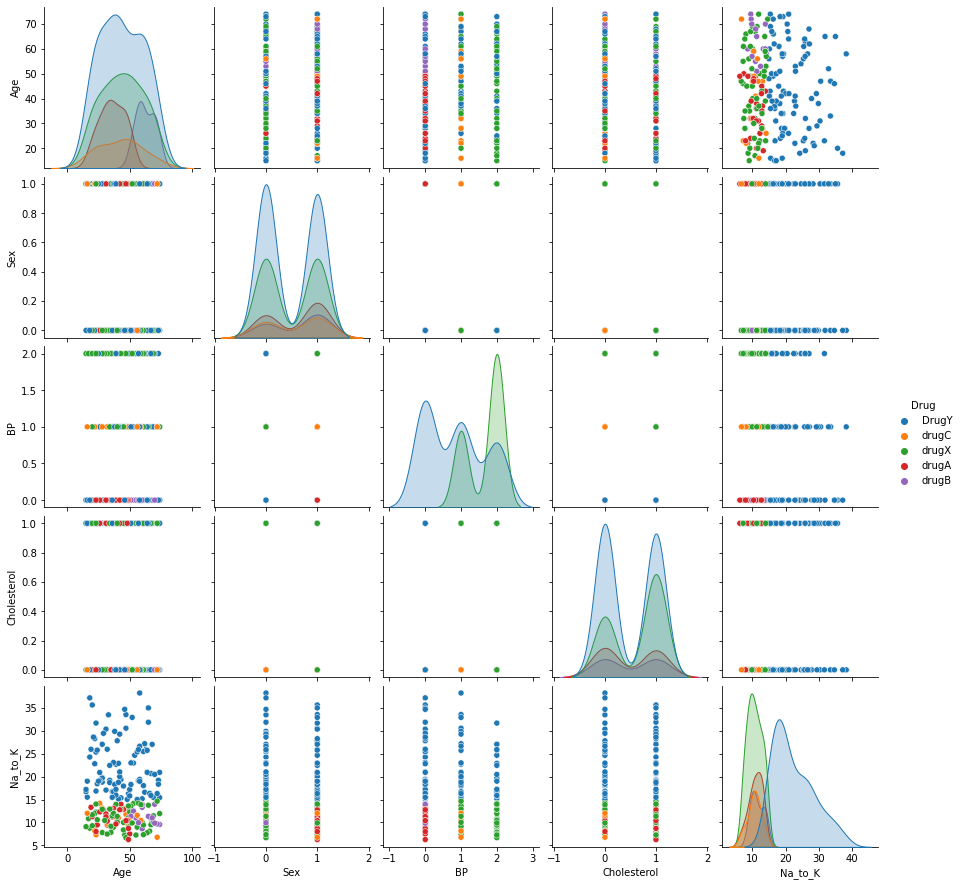

In [153]:
sns.pairplot(df, hue='Drug')

In [155]:
X = df[['Sex','Age','BP','Cholesterol','Na_to_K']]
Y = df[['Drug']]
X.size
Y.size

200

In [156]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.7,random_state=50)

In [157]:
drugmodel_rf = RandomForestClassifier(n_estimators=25)
y_model_drug = drugmodel_rf.fit(Xtrain, Ytrain).predict(Xtest)
print('Accuracy for Drug Prediction using Random Forest: ',round(accuracy_score(Ytest, y_model_drug),3))

Accuracy for Drug Prediction Random Forest 0.943


<ipython-input-157-d5f185751193>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_model_drug = drugmodel_rf.fit(Xtrain, Ytrain).predict(Xtest)


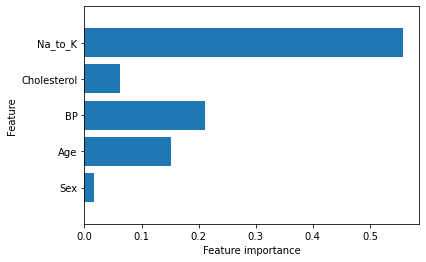

In [158]:
n_features = drugmodel_rf.n_features_
plt.barh(np.arange(n_features), drugmodel_rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features);

In [163]:
X = df[['Age','BP','Cholesterol','Na_to_K']]
Y = df[['Drug']]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.7,random_state=50)
drugmodel_rf = RandomForestClassifier(n_estimators=25)
y_model_drug = drugmodel_rf.fit(Xtrain, Ytrain.values.ravel()).predict(Xtest)
print('Accuracy for Drug Prediction using Random Forest with Sex Removed: ',round(accuracy_score(Ytest, y_model_drug),3))

Accuracy for Drug Prediction using Random Forest with Sex Removed:  0.914


Text(0, 0.5, 'Testing Accuracy')

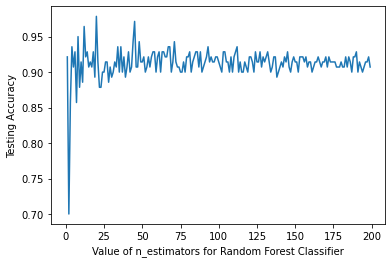

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(Xtrain, Ytrain.values.ravel())
    y_pred = rfc.predict(Xtest)
    scores.append(accuracy_score(Ytest, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [166]:
max(scores)


0.95